In [1]:
import pandas as pd
import numpy as np


## read the loan dataset.
df = pd.read_csv("loan.csv", low_memory=False)  #set low_memory to avoid warning
pd.set_option('display.max_columns', None)  #to show all the columns
pd.set_option('display.max_rows', None)

## Checking for datatypes of all columns

In [2]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [3]:
df.shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning

## Dropping dupicate rows

In [5]:
df = df.drop_duplicates(keep='last')
df.shape

(39717, 111)

## Finding the columns where there is a only single value

In [6]:
single_val_cols = [col for col in df.columns if df[col].nunique() == 1]

single_val_cols # list of columns having a single value

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

## Removing the columns having only a single value

In [7]:

df = df.drop(columns=single_val_cols)

df.shape

(39717, 102)

In [8]:
# A function to find null percentage of all the columns.
def find_null_percent(_df) :
    null_percent_map = {}
    total_rows = len(_df)
    for col_name in _df.columns:
        blanks = _df[col_name].isnull().sum()   
        null_percent = (blanks / total_rows) * 100
        null_percent_map[col_name] = null_percent
    return null_percent_map


In [9]:
null_percent_map = find_null_percent(df)
null_percent_map

{'id': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'emp_title': 6.191303472064859,
 'emp_length': 2.7066495455346575,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'loan_status': 0.0,
 'url': 0.0,
 'desc': 32.58554271470655,
 'purpose': 0.0,
 'title': 0.027695948838029054,
 'zip_code': 0.0,
 'addr_state': 0.0,
 'dti': 0.0,
 'delinq_2yrs': 0.0,
 'earliest_cr_line': 0.0,
 'inq_last_6mths': 0.0,
 'mths_since_last_delinq': 64.66248709620565,
 'mths_since_last_record': 92.98537150338646,
 'open_acc': 0.0,
 'pub_rec': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.12589067653649572,
 'total_acc': 0.0,
 'out_prncp': 0.0,
 'out_prncp_inv': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'total_rec_prncp': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries': 0.0,
 'collection_recovery_fee': 0.0,
 'last_p

## Dropping columns which have more than 40% values as null

In [10]:

df = df.drop(columns=[key for key, value in null_percent_map.items() if value >= 40])
df.shape


(39717, 45)

## Finding columns which have 40% or more values as 0

In [11]:
numerical_columns = df.select_dtypes(include=['number']).columns
zero_percentage = (df[numerical_columns] == 0).mean()
zero_numerical_columns = zero_percentage[zero_percentage >= 0.4].index


## Dropping columns which have more 40% or move values as 0

In [12]:
df = df.drop(columns=zero_numerical_columns)
df.shape

(39717, 36)

## Dropping columns which are not helpful in the analysis

In [13]:

df = df.drop(columns=["id", "member_id", "title", "desc","url", "emp_title", "zip_code"])

df.shape


(39717, 29)

## emp_length columns has many values a na. Filling it with 0 so that we can do analysis on it 

In [14]:
df['emp_length'].fillna('0', inplace=True)

## Data cleaning of few columns. Removing '%', 'months', 'years' etc from the columns.

In [15]:
## removing '%' symbol from int_rate,revol_util to make them numeric

df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float) 

# removing 'months' from 'term'
df['term'] = df['term'].apply(lambda v:v.rstrip('months')).astype(int)

# removing extra values from years data to make it integer
df['emp_length'] = df['emp_length'].apply(lambda v:v.rstrip('years')).str.replace('+', '').str.replace('<', '').astype(int)



In [16]:
df.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,3.971700e+04,39717,39717,39717,39717,39717,39717.000000,39717,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,5,NaN,3,55,3,14,50,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106
top,NaN,NaN,NaN,NaN,NaN,NaN,B,B3,NaN,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,CA,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16
freq,NaN,NaN,NaN,NaN,NaN,NaN,12020,2917,NaN,18899,NaN,16921,2260,32950,18641,7099,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,10308
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,NaN,NaN,4.954226,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,13.315130,NaN,9.294408,13382.528086,48.832152,22.088828,12153.596544,11567.149118,9793.348813,2263.663172,NaN,2678.826162,NaN
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,NaN,NaN,3.461960,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,6.678594,NaN,4.400282,15885.016641,28.332634,11.401709,9042.040766,8942.672613,7065.522127,2608.111964,NaN,4447.136012,NaN
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,NaN,NaN,0.000000,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,NaN,NaN,2.000000,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,8.170000,NaN,6.000000,3703.000000,25.400000,13.000000,5576.930000,5112.310000,4600.000000,662.180000,NaN,218.680000,NaN
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,NaN,NaN,4.000000,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,13.400000,NaN,9.000000,8850.000000,49.300000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000,NaN,546.140000,NaN
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,NaN,NaN,9.000000,NaN,8.230000e+04,NaN,NaN,NaN,NaN,NaN,18.600000,NaN,12.000000,17058.000000,72.400000,29.000000,16534.433040,15798.810000,13653.260000,2833.400000,NaN,3293.160000,NaN


# Univariate Analysis

## Checking frequency term wise

In [17]:
term_val_counts = df['term'].value_counts()


In [18]:
# importing required libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# A helper function to display count plot
def disp_countplot(column, title, fig_size=(8,6)):
    plt.figure(figsize=fig_size)
    sns.countplot(data=df, x=column, hue=column)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

## Plotting 'term' frequency

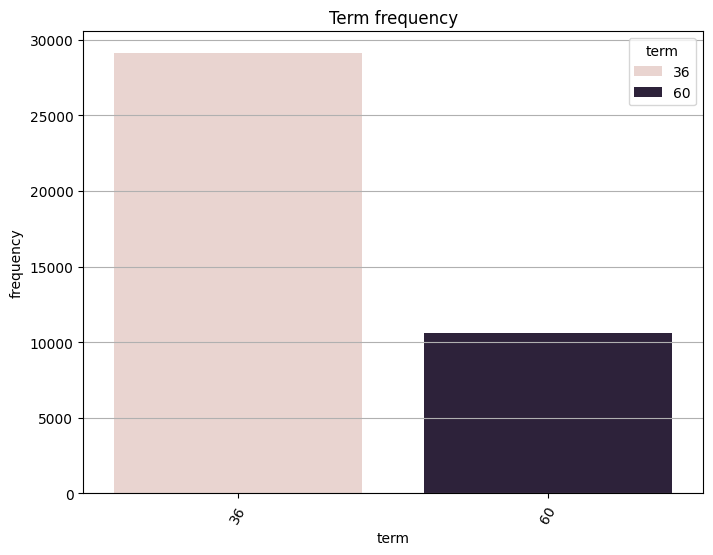

In [19]:
disp_countplot('term', 'Term frequency')

## checking loan_status frequency

In [20]:
df['loan_status'].value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

## plotting loan_status frequency

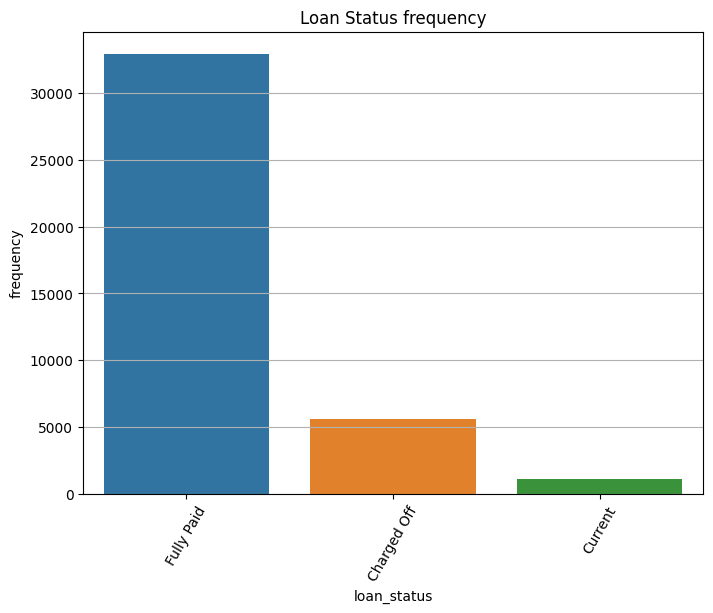

In [21]:
disp_countplot('loan_status', 'Loan Status frequency')

## Since we need to analyse data of Fully Paid and Charged Off, data of 'loan_status' = 'Current' is not of much help. So, filtering out the data.

In [22]:
## filtering out 'Current'

df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]



## Plotting loan_status after filtering out 'Current'

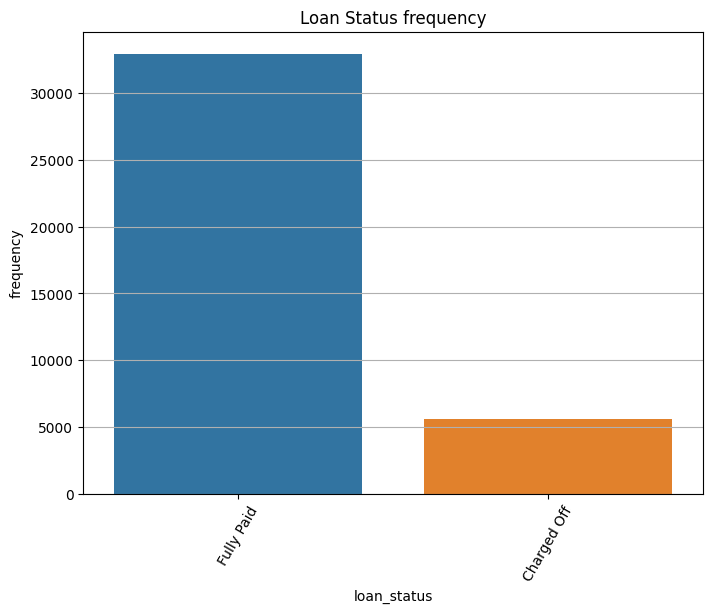

In [23]:
disp_countplot('loan_status', 'Loan Status frequency')

## Checking frequency 'purpose' wise.

In [24]:
df['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

## Plotting 'purpose' wise count.

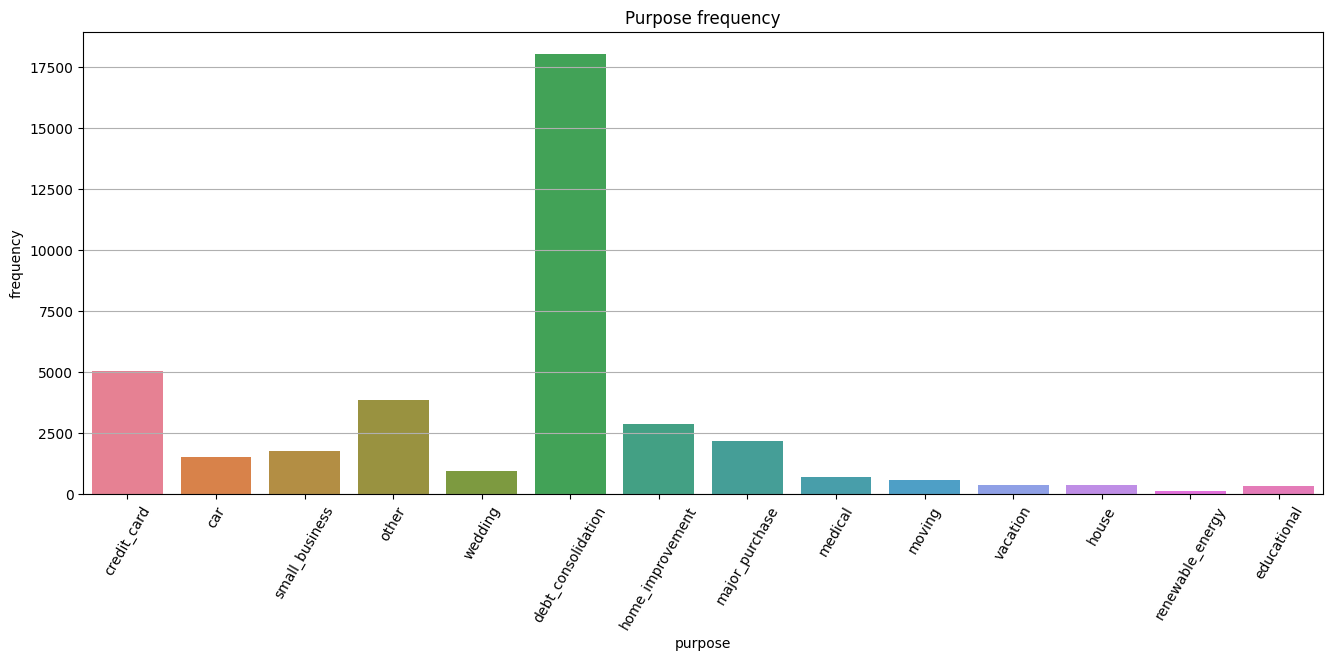

In [25]:
disp_countplot('purpose', 'Purpose frequency', fig_size=(16,6))

## Checking 'grade' wise count.

In [26]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

## Plotting 'grade' wise count.

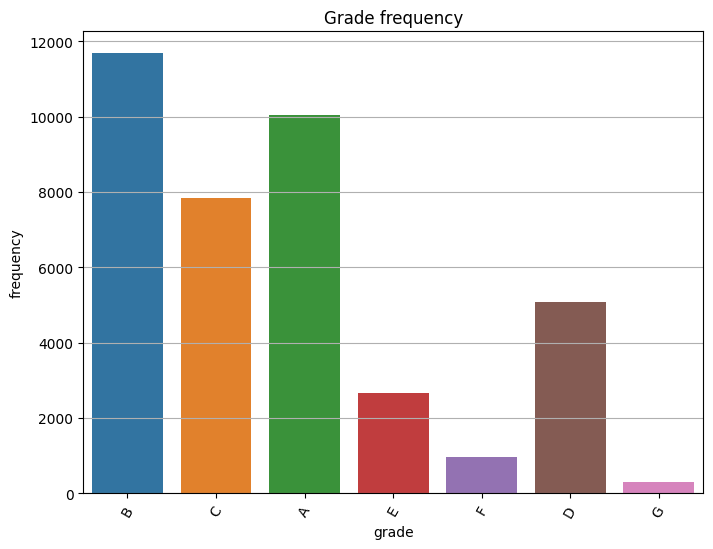

In [27]:
disp_countplot('grade', 'Grade frequency')

## Checking 'sub_grade' wise count.

In [28]:
df['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

## Plotting 'sub_grade' wise count.

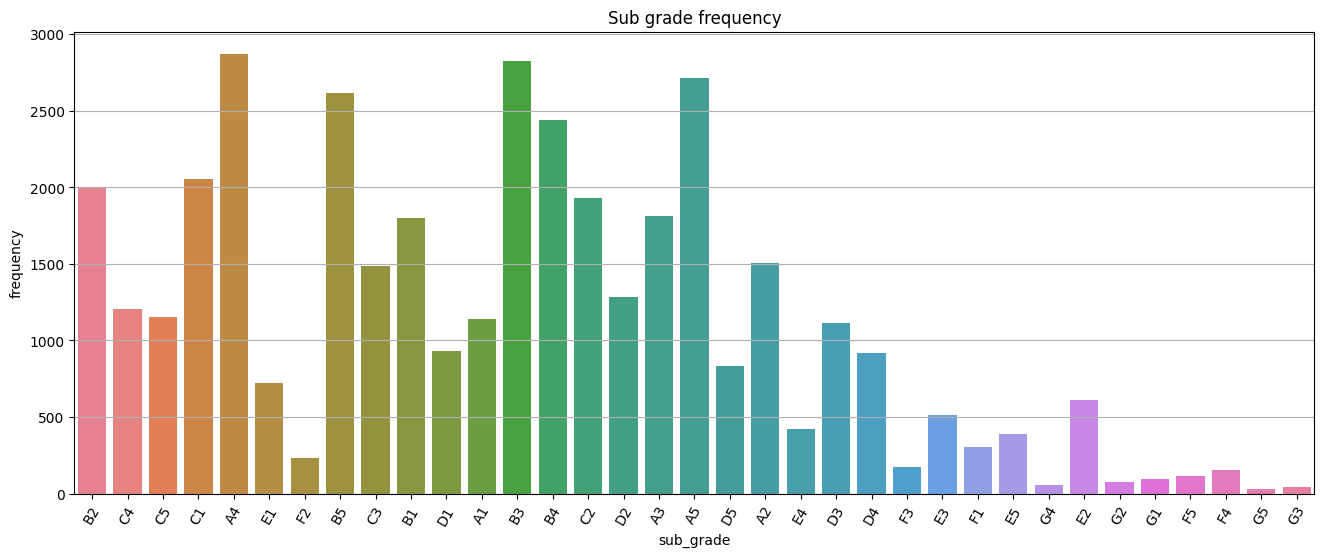

In [29]:
disp_countplot('sub_grade', 'Sub grade frequency', fig_size=(16,6))

## Checking 'emp_length' wise count.

In [30]:
df['emp_length'].value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: count, dtype: int64

## Plotting 'emp_length' wise frequency.

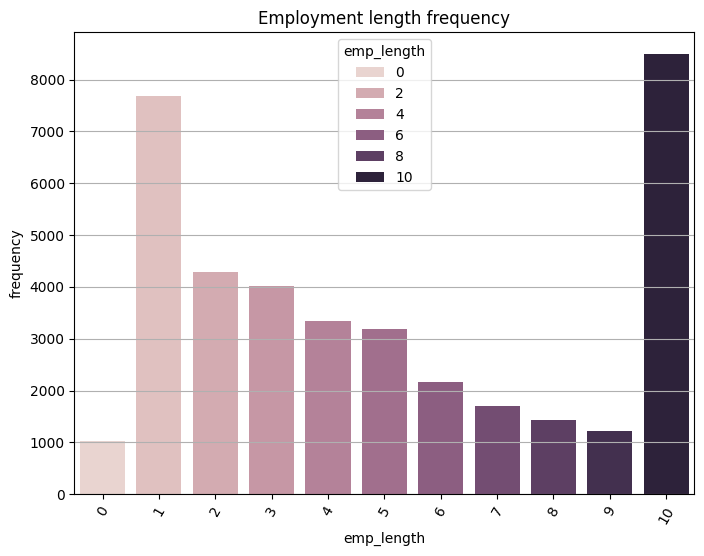

In [31]:
disp_countplot('emp_length', 'Employment length frequency')

## Checking 'home_ownership' wise count.

In [32]:
df['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

## Plotting 'home_ownership' wise frequency.

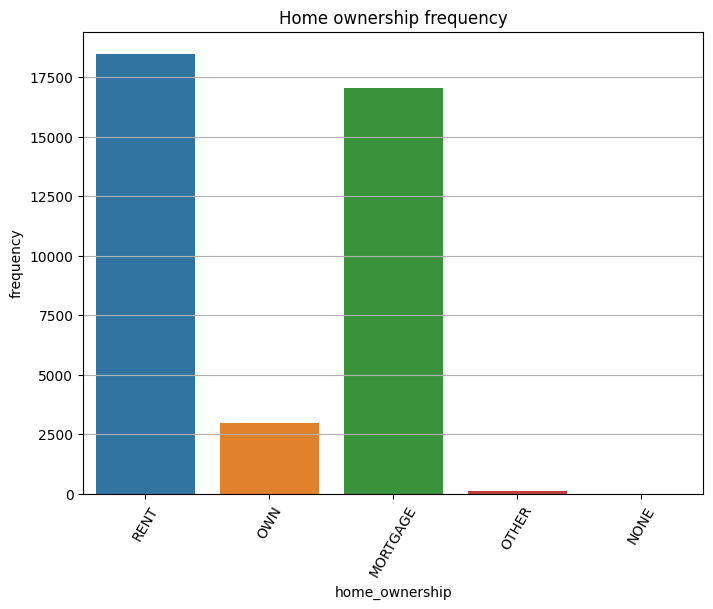

In [33]:
disp_countplot('home_ownership', 'Home ownership frequency')

In [34]:
## some helper functions.

#returns full year based on 2 digit years
#As the data is till 2011, if a year if less than or equal to 11 it should be 2000 + 2 digit year 
#otherwise 1900 + 2 digits year
def parse_year(year):
    if year <= 11:
        return 2000 + year
    else:
        return 1900 + year

#a function to create segments based on employment length
def yr_segments(emp_length) :
        if emp_length <= 2 :
            return 'Junior'
        elif emp_length <= 5 :
            return 'Middle'
        elif emp_length <= 8 :
            return 'Middle Senior'
        else:
            return 'Senior'
        
#creates segments for a column. Consider whole number for segments - 
#useful for example for years as years in decimal does not make sense
def create_bins_whole(column, num_bins) :
    min_val = df[column].min()
    max_val = df[column].max()
    _bins = [i for i in range(min_val, max_val+1, (max_val-min_val)//num_bins)]
    return pd.cut(df[column], bins=_bins)

#creates segments for a column. Consider decimal number for segments - 
def create_bins(column, num_bins) :
    min_val = df[column].min()
    max_val = df[column].max()
    _bins = [min_val + i * ((max_val - min_val) / num_bins) for i in range(num_bins)] + [max_val]
    return pd.cut(df[column], bins=_bins)

## creating some derived columns by creating segments

In [35]:
# creates 6 segments for loan amounts
df['loan_amnt_categories'] = create_bins_whole('loan_amnt', 6)

# creates 6 segments for annual income
df['annual_inc_categories']  = create_bins('annual_inc', 6) 

# creates 6 segments for installment amount
df['installment_categories'] = create_bins('installment', 6)

# creates 6 segments for dti
df['dti_categories'] = create_bins('dti', 6)

# creates 6 segments for earliest_cr_line
df['earliest_cr_line_yr'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.strftime('%y').apply(lambda x: parse_year(int(x)))

# creates 6 segments for earliest_cr_line_yr
df['earliest_cr_line_yr_categories']= create_bins_whole('earliest_cr_line_yr', 6) 

# creates 6 segments for revol_bal
df['revol_bal_categories'] = create_bins('revol_bal', 6)

# creates 6 segments for revol_util
df['revol_util_categories'] = create_bins('revol_util', 6)

# creates 6 segments for total_acc
df['total_acc_categories'] = create_bins('total_acc', 6)

# creates 6 segments for total_pymnt_inv
df['total_pymnt_inv_categories'] = create_bins('total_pymnt_inv', 6)

# creates 6 segments for total_rec_prncp
df['total_rec_prncp_categories'] = create_bins('total_rec_prncp',6)

# creates 6 segments for total_rec_int
df['total_rec_int_categories'] = create_bins('total_rec_int',6)

# creates 6 segments for last_pymnt_amnt
df['last_pymnt_amnt_categories'] = create_bins('last_pymnt_amnt',6)

# creates 4 segments for emp_length as emp_dration
df['emp_duration'] = df['emp_length'].apply(lambda x: yr_segments(x))

## Checking frequency in annaul income categories

In [36]:
df['annual_inc_categories'].value_counts()

annual_inc_categories
(4000.0, 1003333.333]         38562
(1003333.333, 2002666.667]       11
(2002666.667, 3002000.0]          1
(3002000.0, 4001333.333]          1
(5000666.667, 6000000.0]          1
(4001333.333, 5000666.667]        0
Name: count, dtype: int64

## As there are outliers in annual income so those needs to be dropped.

In [37]:
## drop outliers
q25 = df['annual_inc'].quantile(0.25)
q75 = df['annual_inc'].quantile(0.75)

df = df[(df['annual_inc'] > q25) & (df['annual_inc'] < q75)]

## createing the 6 segments after removing outliers
df['annual_inc_categories']  = create_bins('annual_inc', 6) 

## Checking frequency in annaul income categories after creating new bins

In [38]:
df['annual_inc_categories'].value_counts()

annual_inc_categories
(47006.66, 54005.32]    4110
(54005.32, 61003.98]    3894
(40008.0, 47006.66]     3450
(68002.64, 75001.3]     3086
(61003.98, 68002.64]    2818
(75001.3, 81999.96]     1790
Name: count, dtype: int64

## Plotting frequency in annual income categories

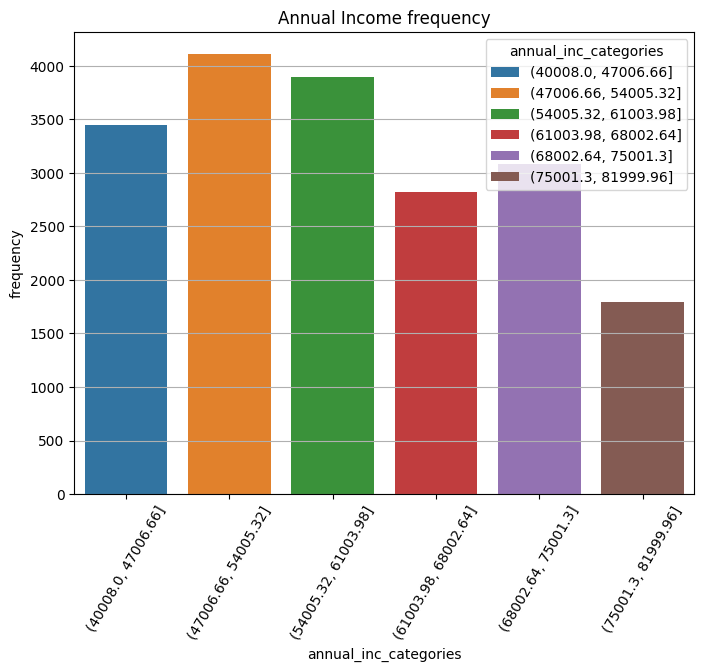

In [39]:
disp_countplot('annual_inc_categories', 'Annual Income frequency')

## Plotting frequency in loan amount categories

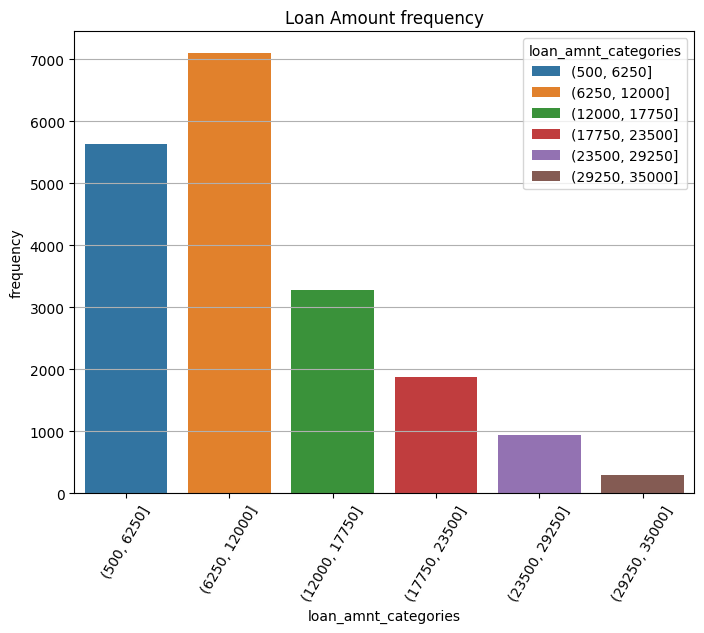

In [40]:
disp_countplot('loan_amnt_categories', 'Loan Amount frequency')

## Plotting frequency in installment categories

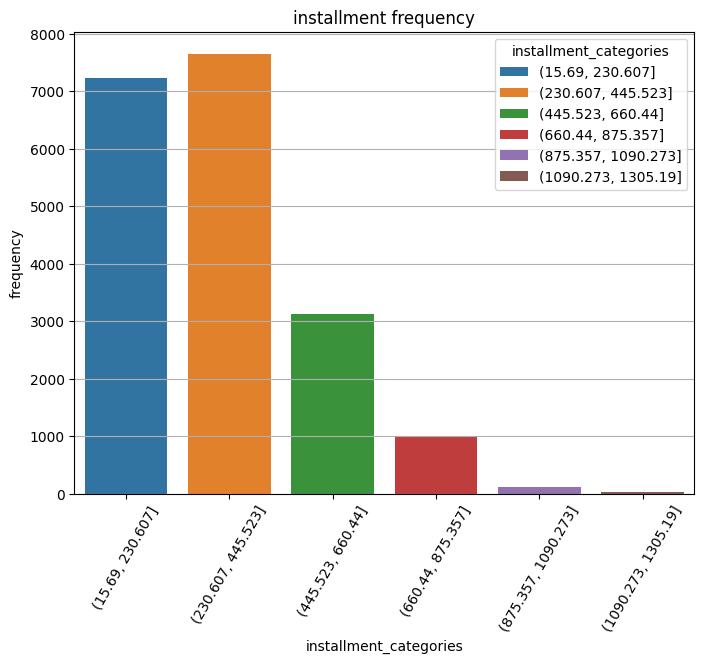

In [41]:
disp_countplot('installment_categories', 'installment frequency')

## Plotting frequency in dti categories

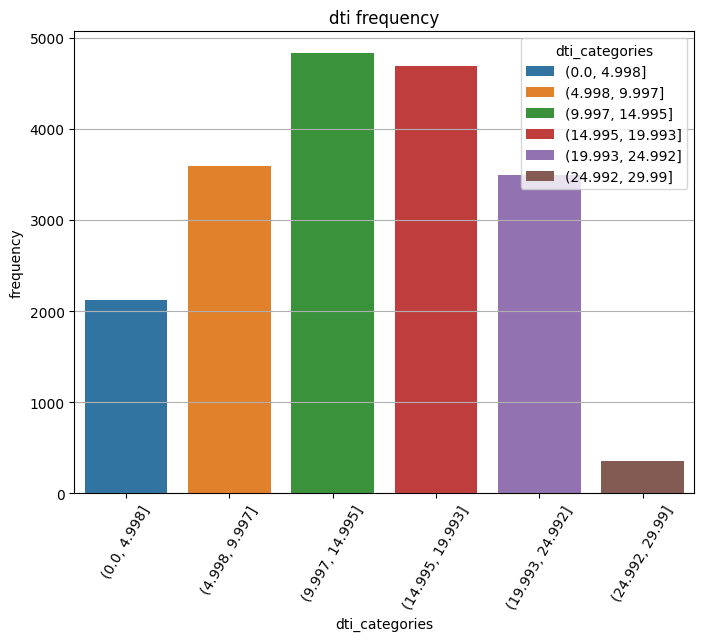

In [42]:
disp_countplot('dti_categories', 'dti frequency')

## Plotting frequency in Earlier Credit Line Year categories

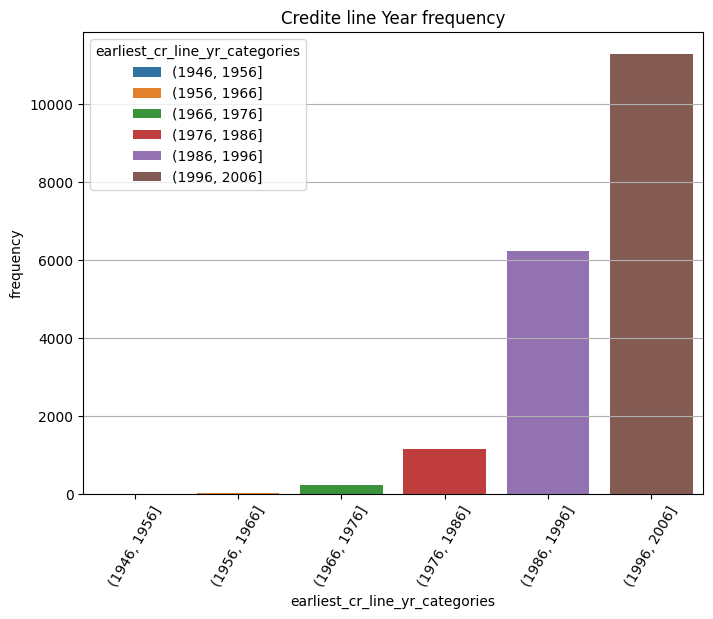

In [43]:
disp_countplot('earliest_cr_line_yr_categories', 'Credite line Year frequency')

In [44]:
## Plotting frequency in Revolving balance categories

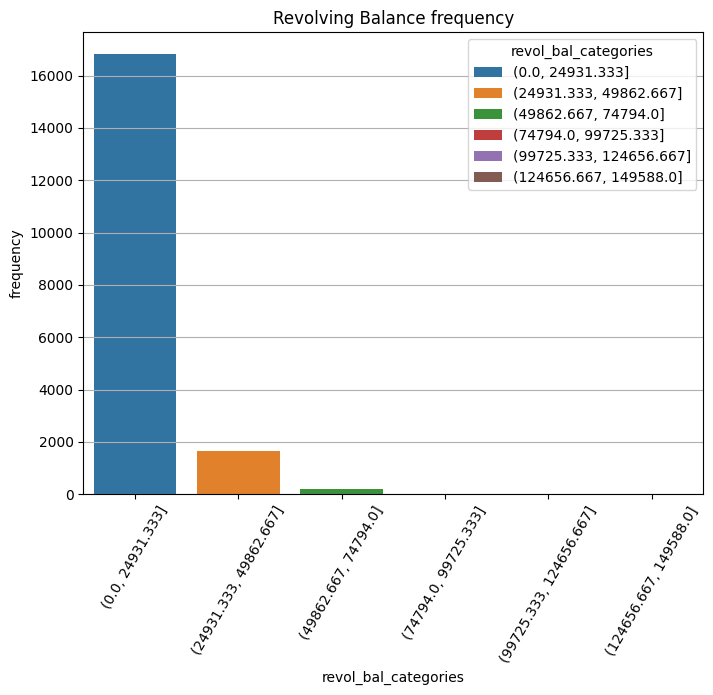

In [45]:
disp_countplot('revol_bal_categories', 'Revolving Balance frequency')

In [46]:
df['emp_duration'].value_counts()

emp_duration
Junior           5844
Middle           5377
Senior           5139
Middle Senior    2789
Name: count, dtype: int64

In [47]:
## Plotting frequency in Employement durattion categories

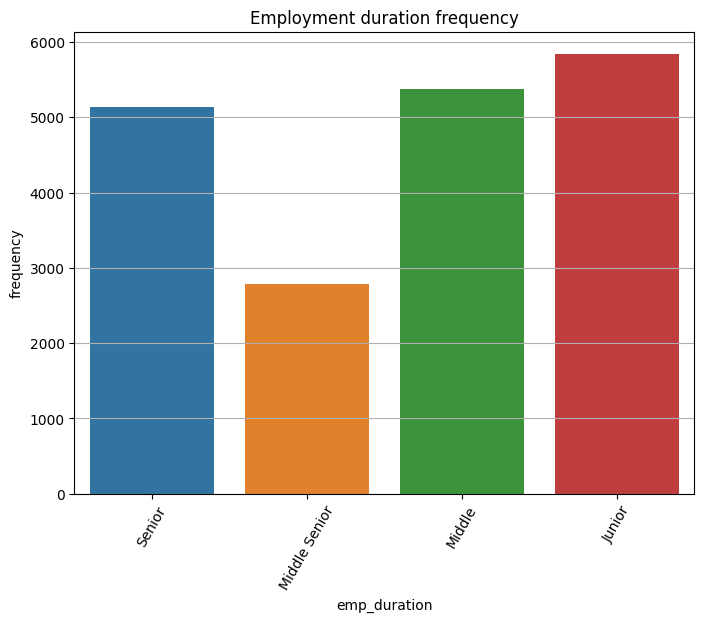

In [48]:
disp_countplot('emp_duration', 'Employment duration frequency')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19149 entries, 3 to 39711
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   loan_amnt                       19149 non-null  int64   
 1   funded_amnt                     19149 non-null  int64   
 2   funded_amnt_inv                 19149 non-null  float64 
 3   term                            19149 non-null  int32   
 4   int_rate                        19149 non-null  float64 
 5   installment                     19149 non-null  float64 
 6   grade                           19149 non-null  object  
 7   sub_grade                       19149 non-null  object  
 8   emp_length                      19149 non-null  int32   
 9   home_ownership                  19149 non-null  object  
 10  annual_inc                      19149 non-null  float64 
 11  verification_status             19149 non-null  object  
 12  issue_d                

In [50]:
# A helper function for displaying barplot

def disp_barplot(x_col, y_col, fig_size=(8,6)):
    plt.figure(figsize=fig_size)
    sns.barplot(x=x_col, y=y_col, data=df, hue=x_col)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

# Bivariate Analysis

## Analysis of Grade and Loan Amount

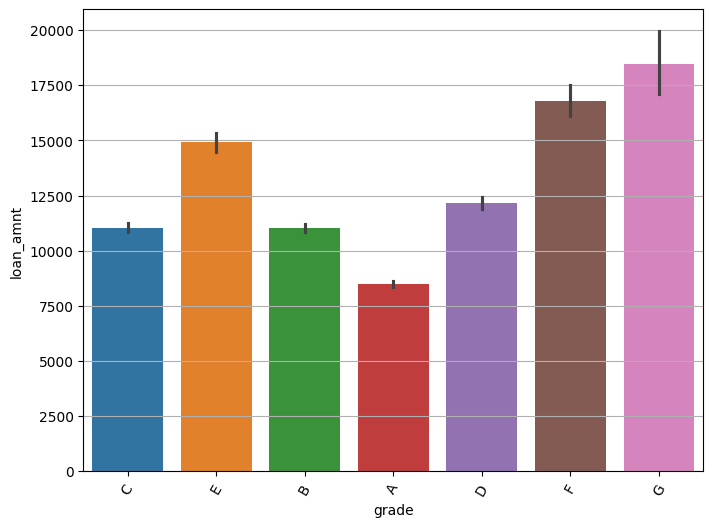

In [51]:
disp_barplot('grade', 'loan_amnt')

## Analysis of Term and Loan Amount

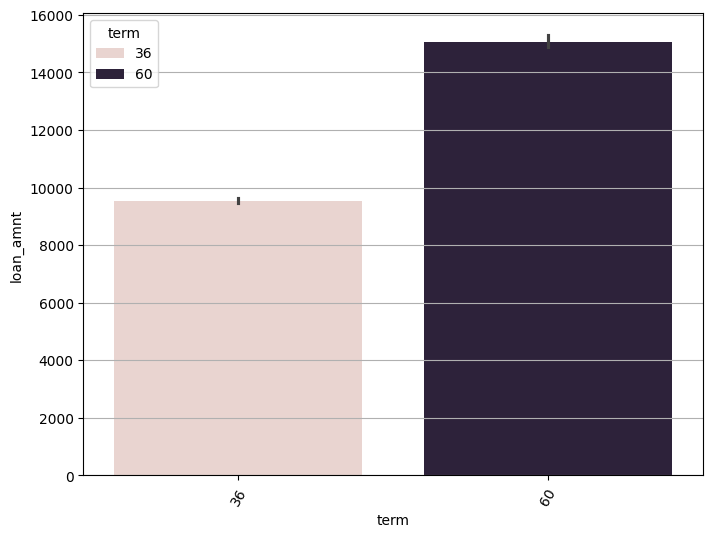

In [52]:
disp_barplot('term', 'loan_amnt')

## Analysis of Loan Status and Loan Amount

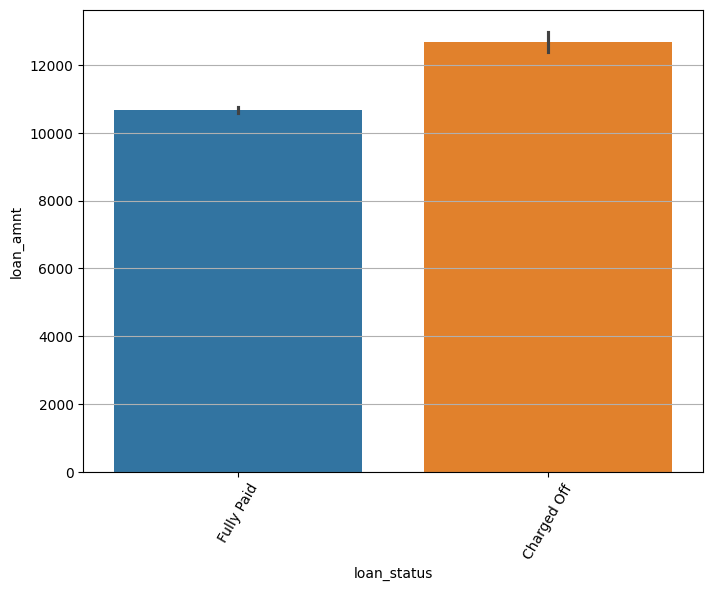

In [53]:
disp_barplot('loan_status', 'loan_amnt')

## Analysis of Purpose  and Loan Amount

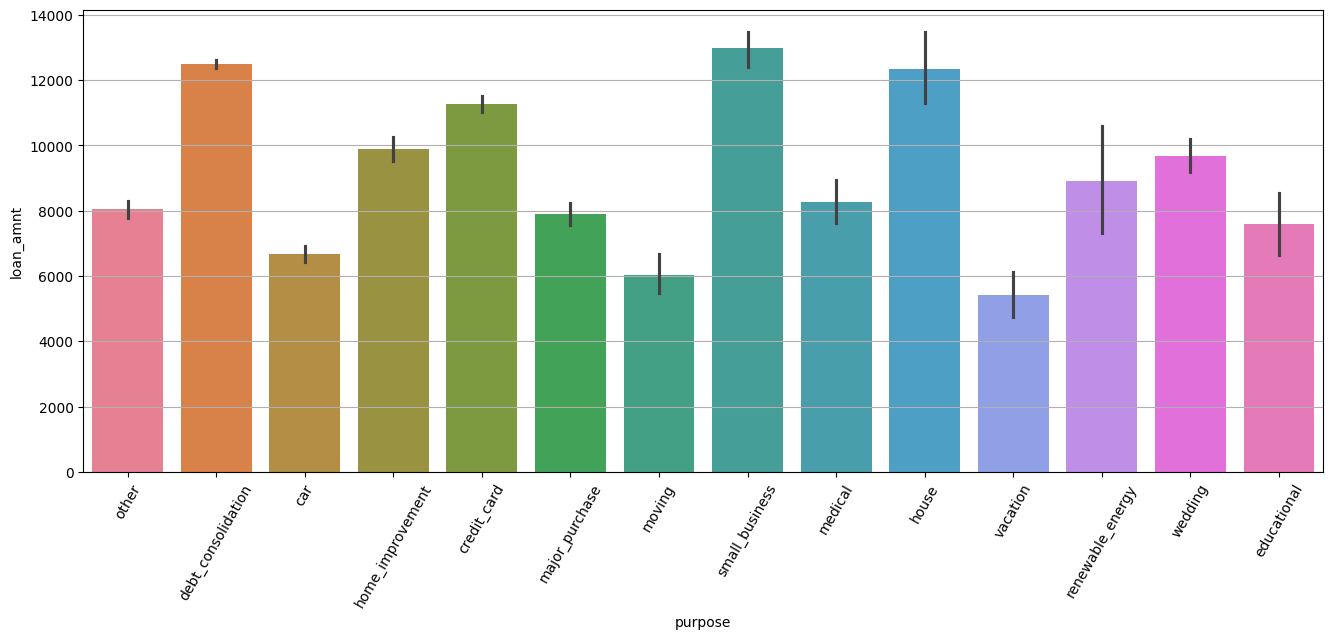

In [54]:
disp_barplot('purpose', 'loan_amnt', fig_size=(16,6))

In [55]:
# A helper function to display box plot
def disp_boxplot(x_col, y_col, fig_size=(8, 6)):
    plt.figure(figsize=fig_size)
    sns.boxplot(x=x_col, y=y_col, data =df)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

# Boxplot purpose and loan amount

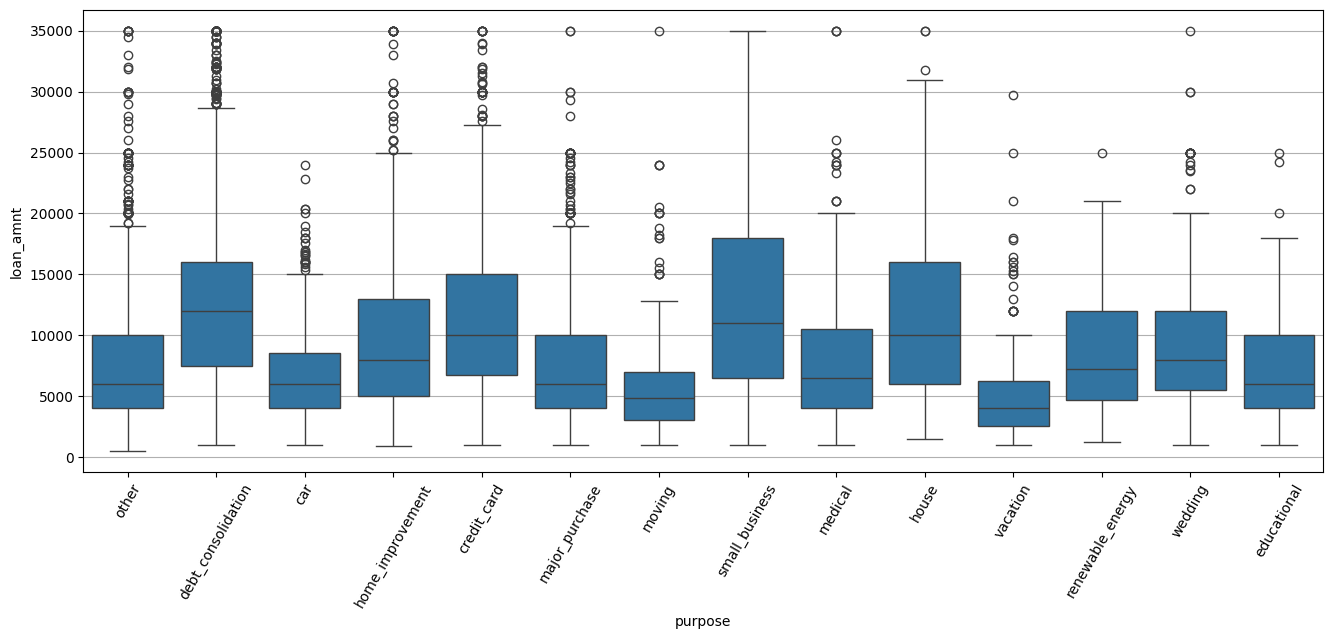

In [56]:
disp_boxplot('purpose', 'loan_amnt', (16, 6))

# Boxplot term and interest rate

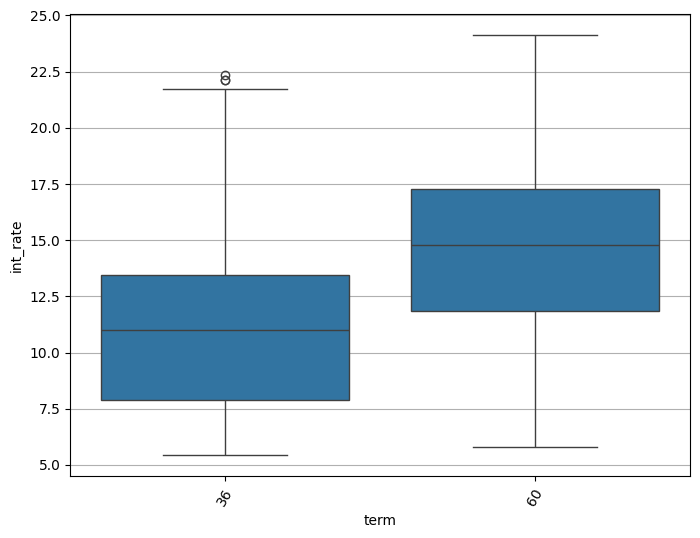

In [57]:
disp_boxplot('term', 'int_rate')

# Boxplot Grade and Interest rate

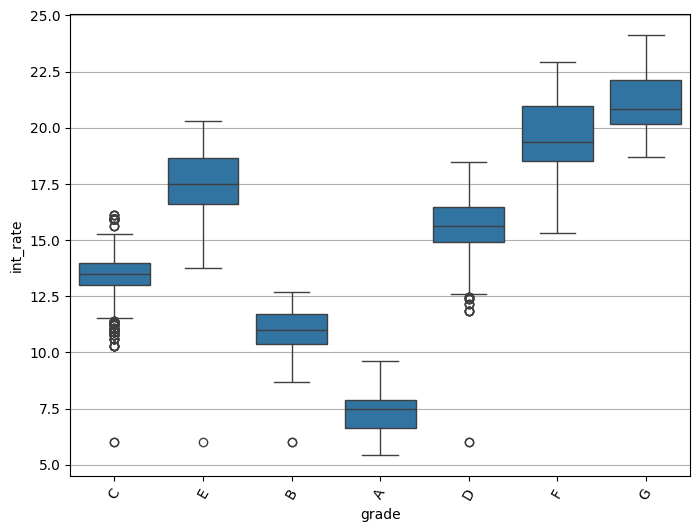

In [58]:
disp_boxplot('grade', 'int_rate')

# Boxplot Subgrade and Interest rate

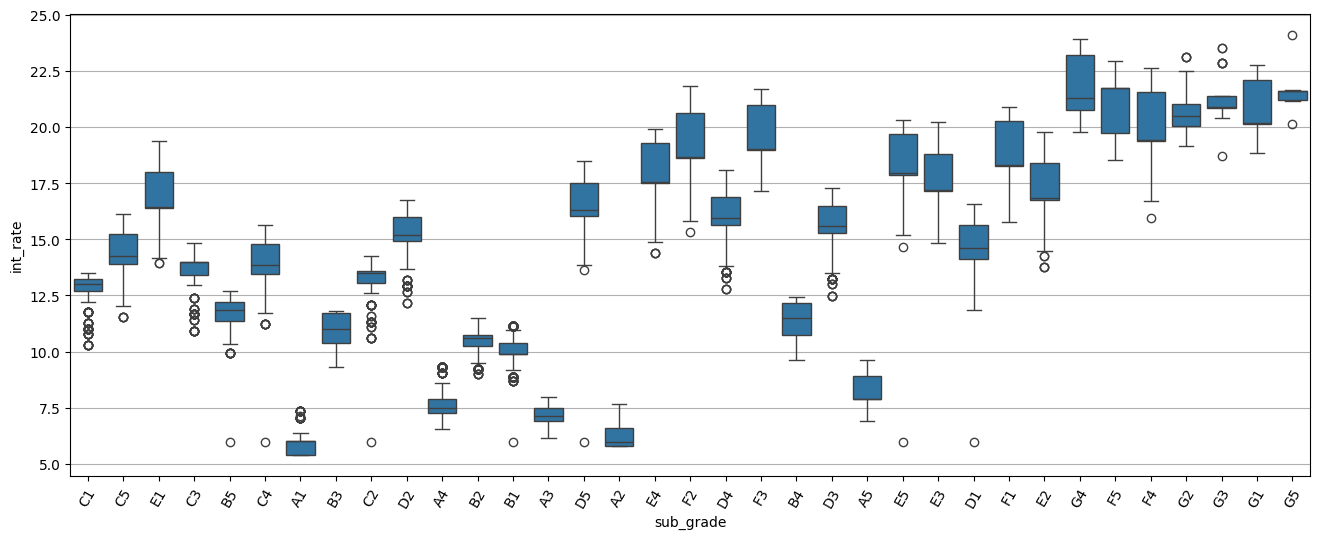

In [59]:
disp_boxplot('sub_grade', 'int_rate', (16, 6))

# Selecting numerical columns for correlation analysis using heatmap

<Axes: title={'center': 'Heatmap'}>

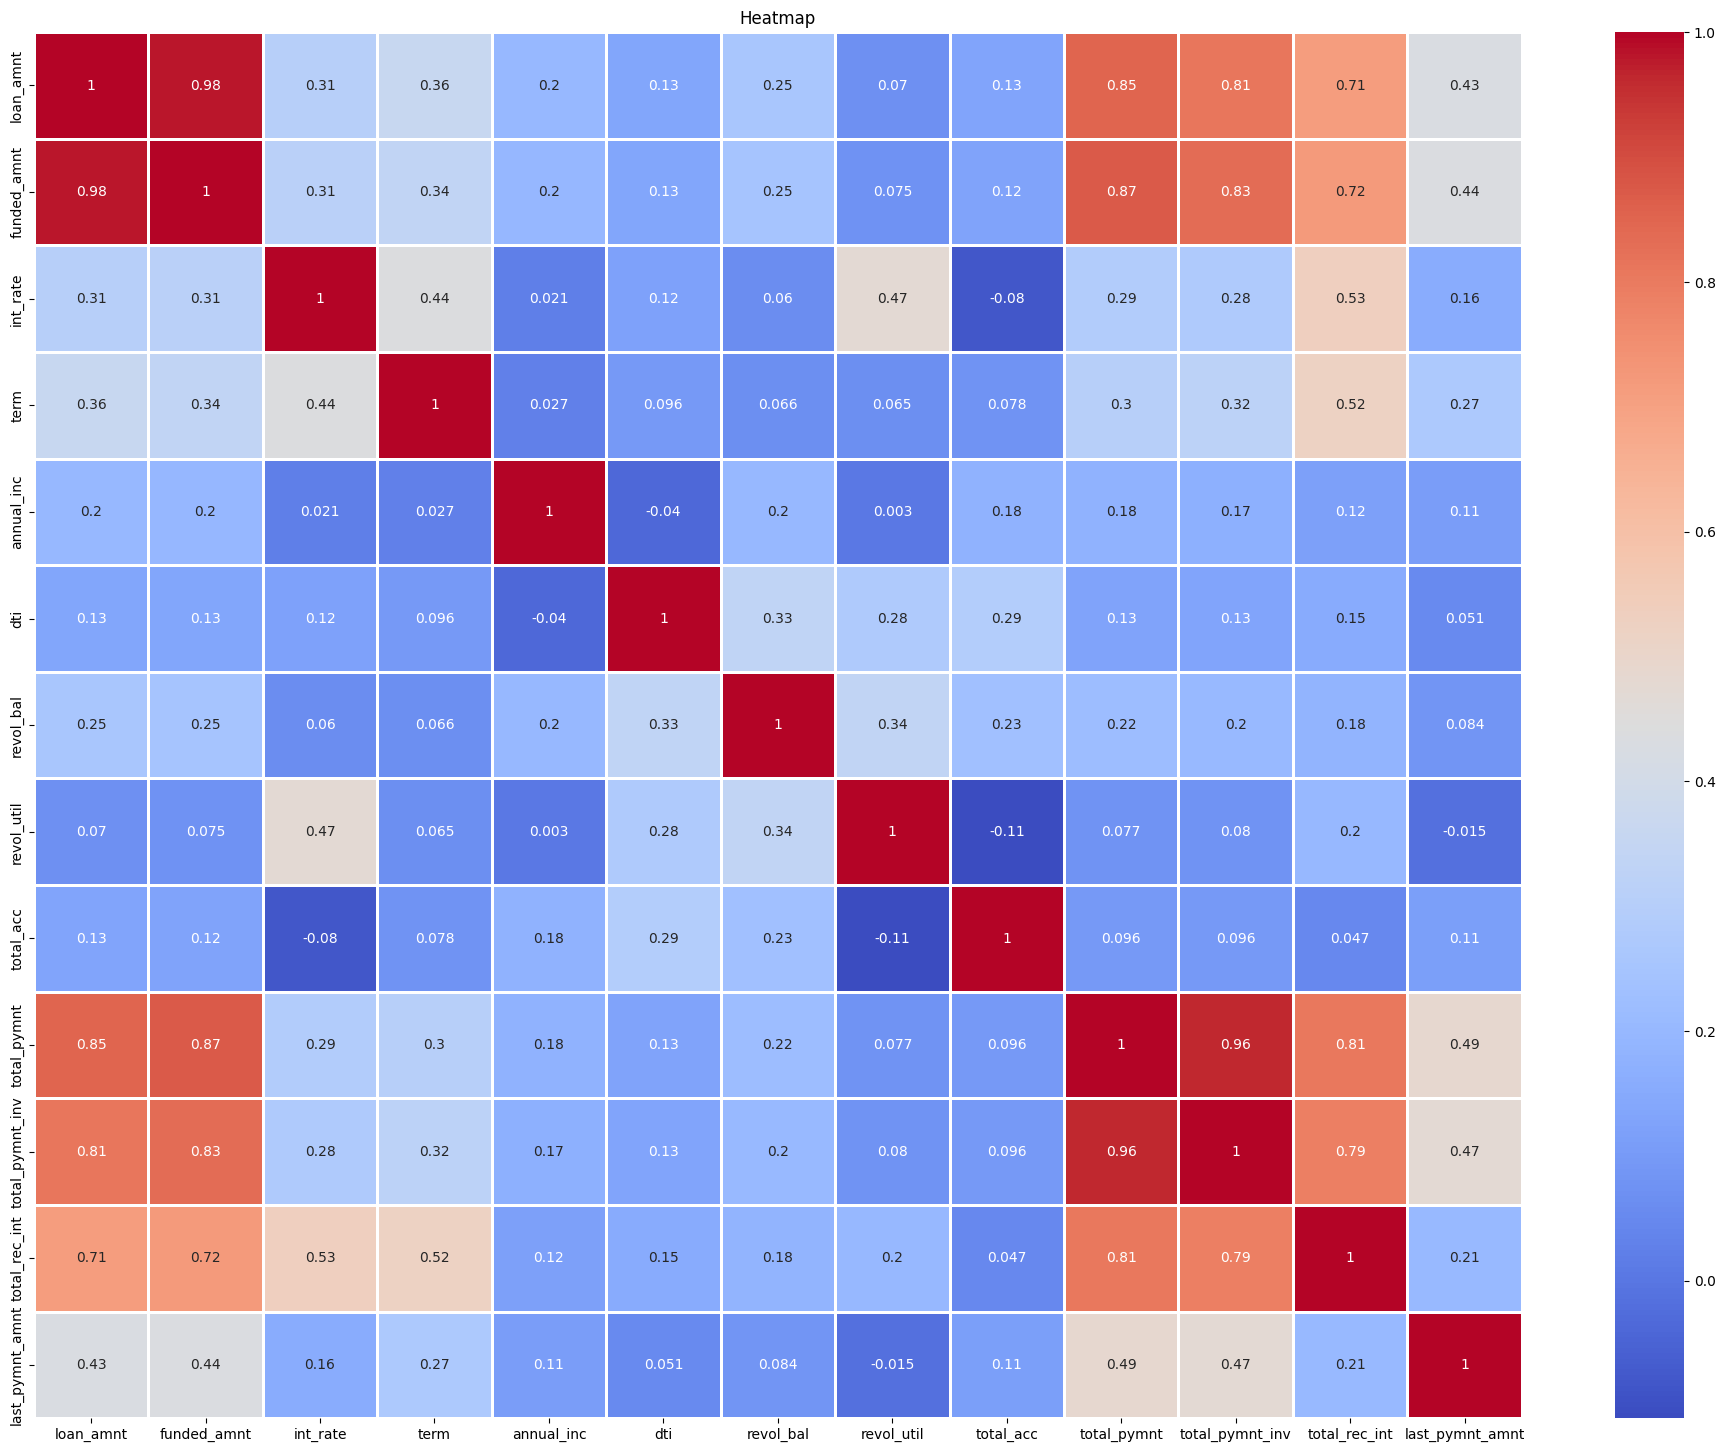

In [60]:

selected_cols = ['loan_amnt','funded_amnt','int_rate','term', 'annual_inc','dti', 'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt']

plt.figure(figsize=(24, 18))
plt.title('Heatmap')
sns.heatmap(df[selected_cols].corr(), cmap='coolwarm', annot=True, linewidths=1.0)




## Barplot loan amount categories and interest rate

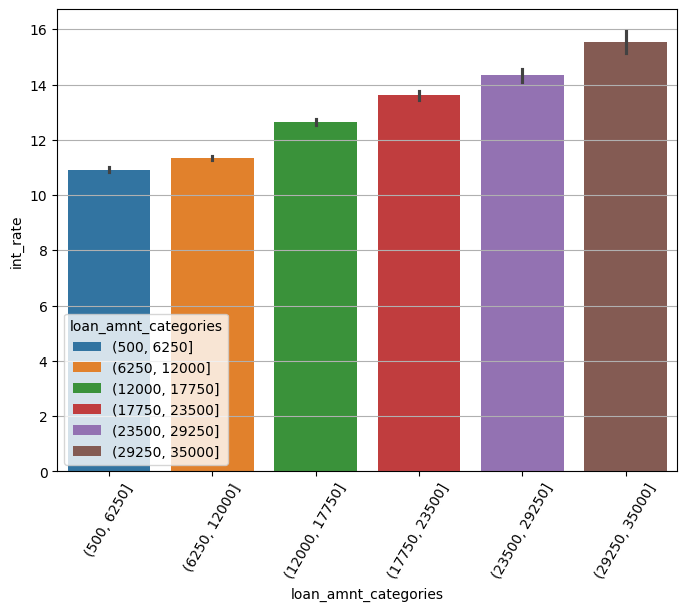

In [61]:
disp_barplot('loan_amnt_categories', 'int_rate')

In [62]:
## Barplot installment categories and interest rate

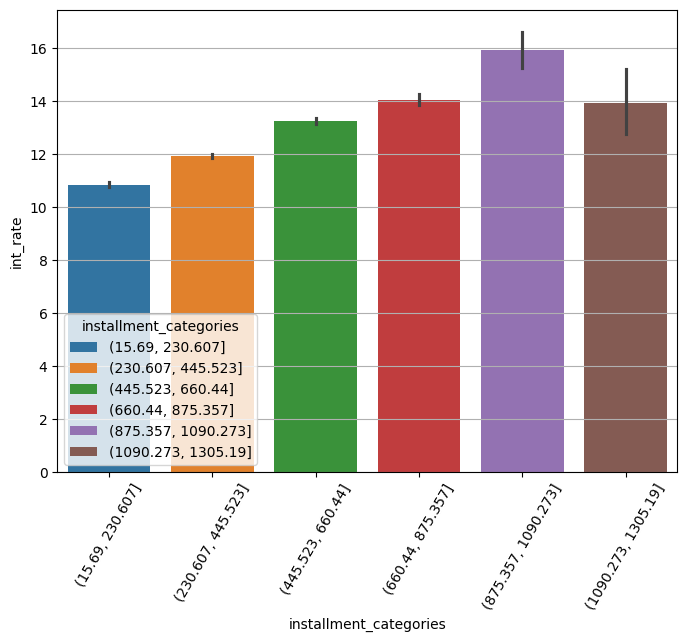

In [63]:
disp_barplot('installment_categories', 'int_rate')

## Barplot annual income categories and interest rate

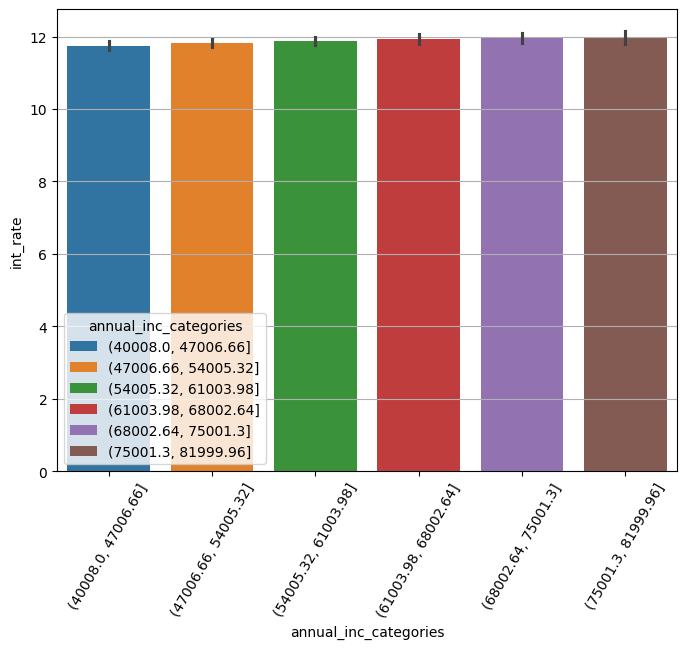

In [64]:
disp_barplot('annual_inc_categories', 'int_rate')

## Barplot loan amount categories and dti

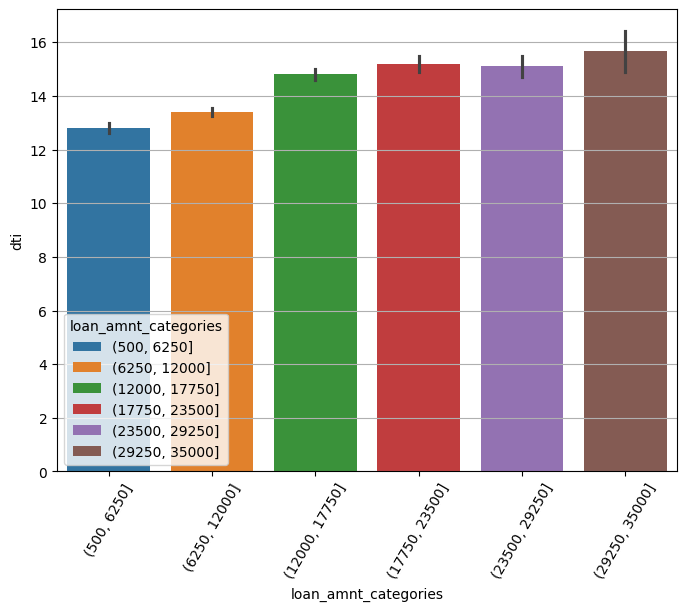

In [65]:
disp_barplot('loan_amnt_categories', 'dti')

## Barplot installment amount categories and dti

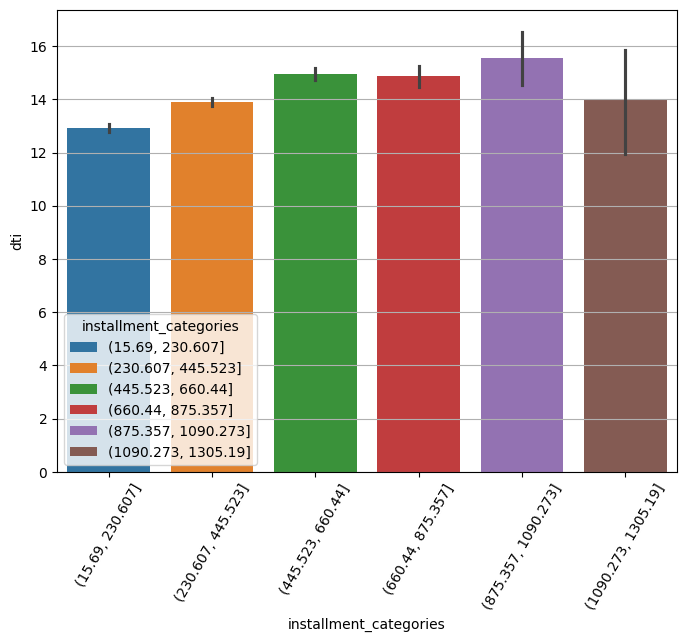

In [66]:
disp_barplot('installment_categories', 'dti')

## Barplot Annual income categories and dti

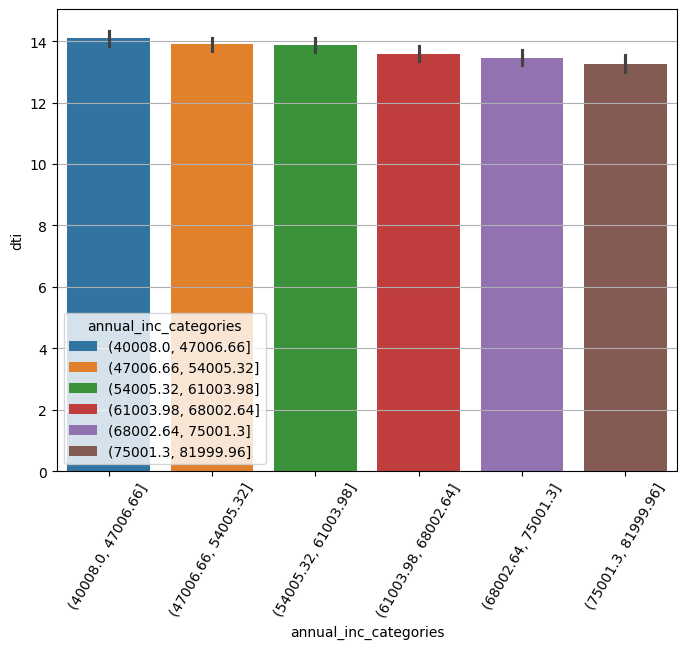

In [67]:
disp_barplot('annual_inc_categories', 'dti')

In [68]:
#Finding defaulters so that further analysis can be done on it

defaulters = df[df['loan_status'] == 'Charged Off']
# Helper function to display barplot based on charged off percentage
def display_pc_charge_off_plot(column, title, xlabel, fig_size=(8, 6)) :
    defaulter_percent = defaulters.groupby(column, observed=False).size().div(df.groupby(column, observed=False).size()).mul(100)
    plt.figure(figsize=fig_size)
    sns.barplot(x=defaulter_percent.index, y=defaulter_percent.values, color='orange')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Charged Off %')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()


## Barplot Annual income categories and defaulters percentage

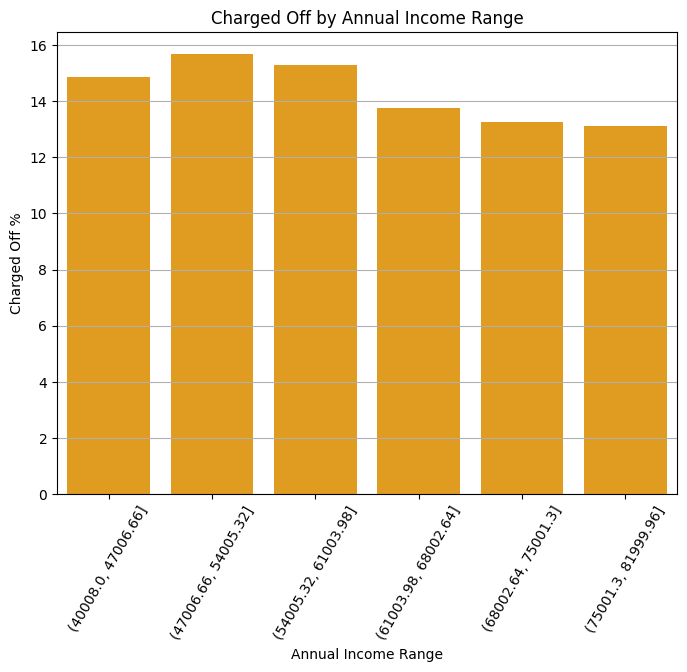

In [69]:
display_pc_charge_off_plot('annual_inc_categories', 'Charged Off by Annual Income Range', 'Annual Income Range')

## Barplot Loan income categories and defaulters percentage

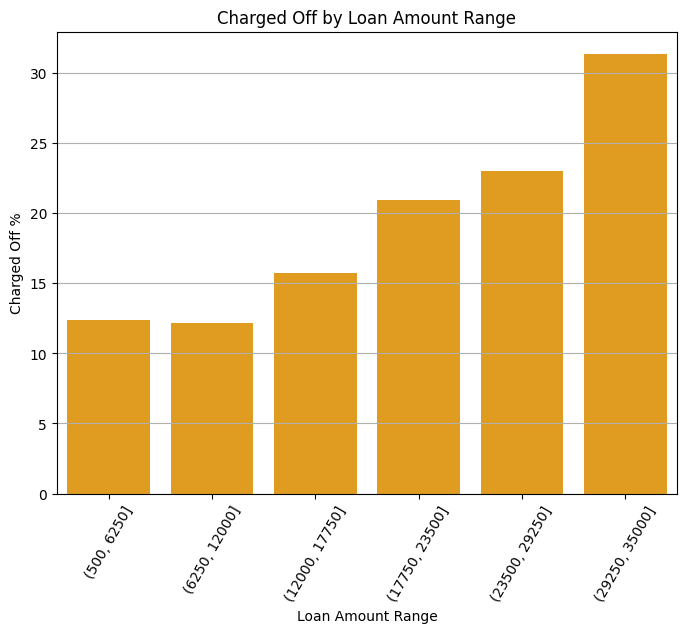

In [70]:
display_pc_charge_off_plot('loan_amnt_categories', 'Charged Off by Loan Amount Range', 'Loan Amount Range')

## Barplot Installment categories and defaulters percentage

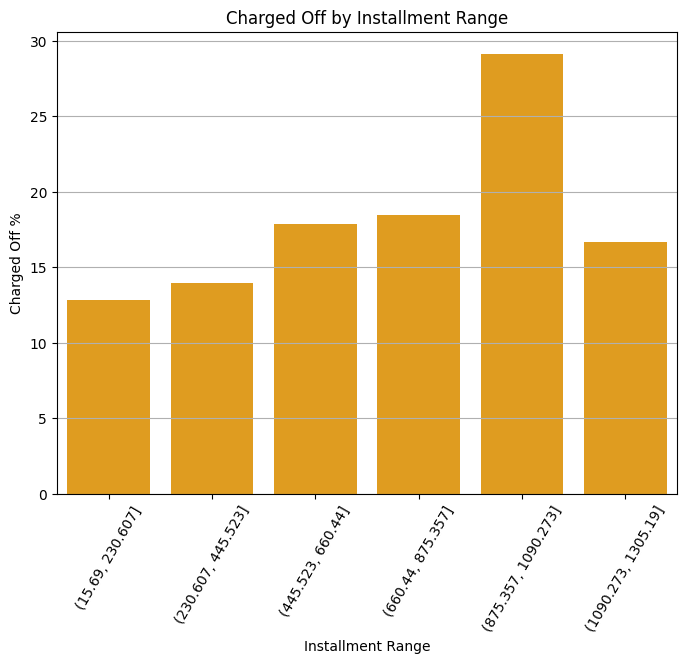

In [71]:
display_pc_charge_off_plot('installment_categories', 'Charged Off by Installment Range', 'Installment Range')

## Barplot terms and defaulters percentage

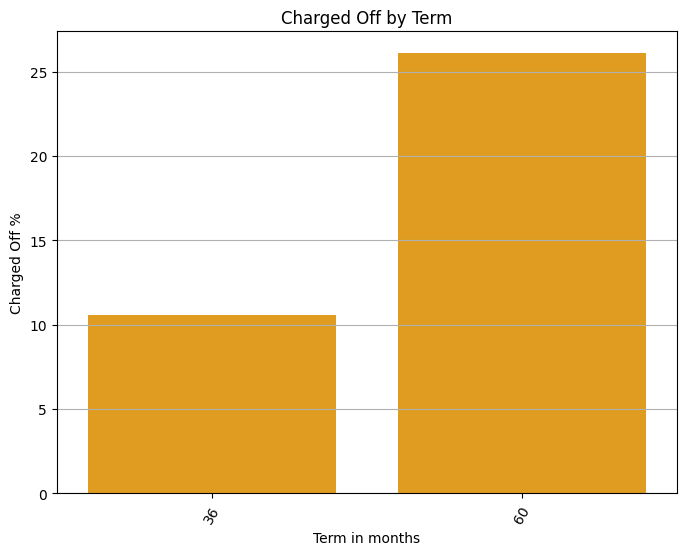

In [72]:
display_pc_charge_off_plot('term', 'Charged Off by Term', 'Term in months')

## Barplot Grade and defaulters percentage

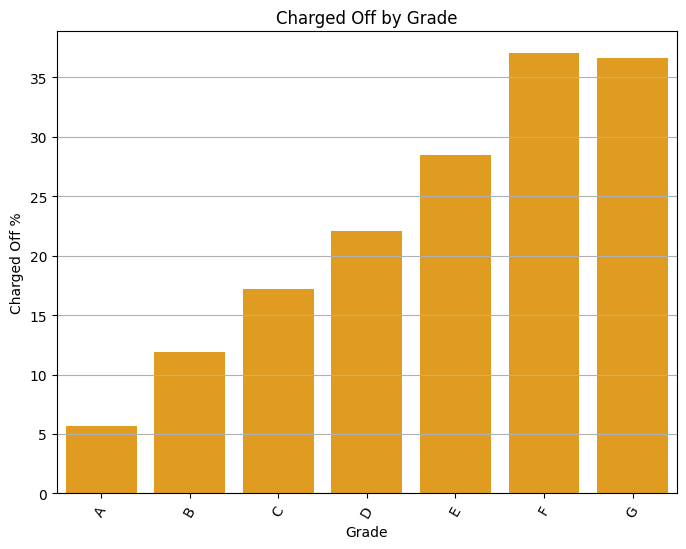

In [73]:
display_pc_charge_off_plot('grade', 'Charged Off by Grade', 'Grade')

## Barplot Sub grade and defaulters percentage

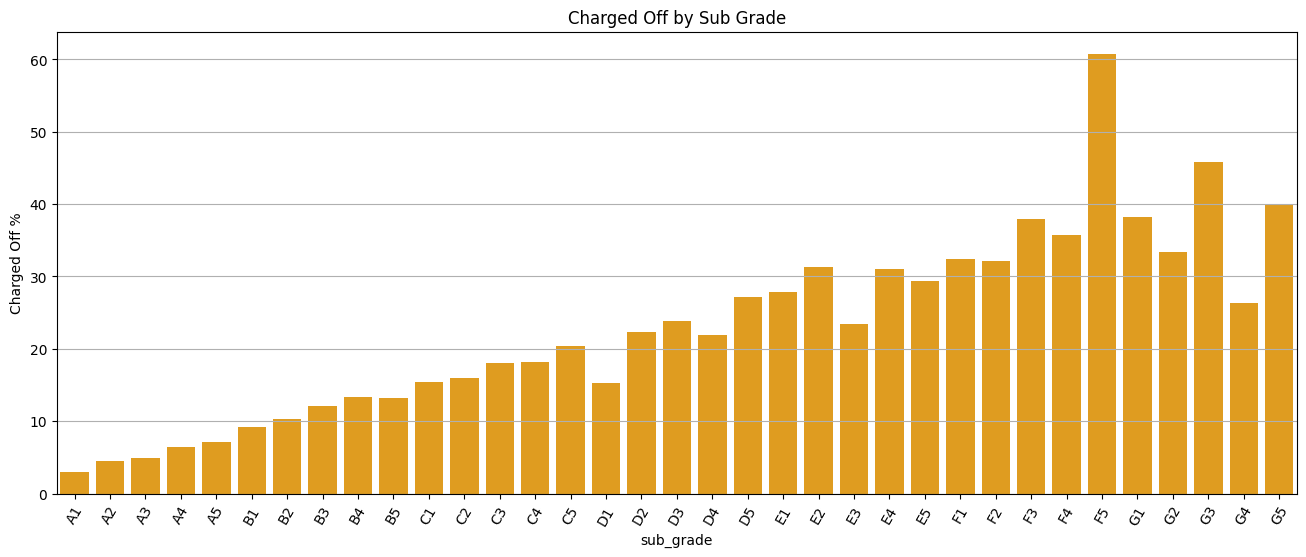

In [74]:
display_pc_charge_off_plot('sub_grade', 'Charged Off by Sub Grade', 'sub_grade', fig_size=(16,6))

## Barplot Verification status and defaulters percentage

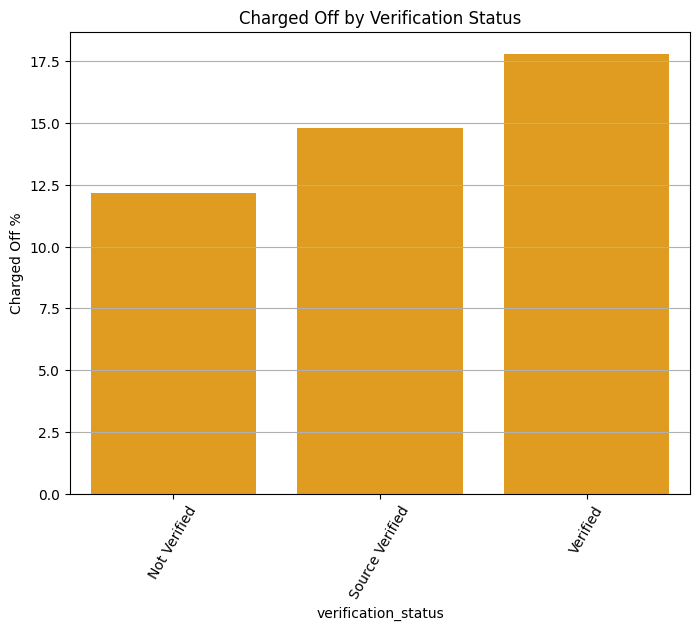

In [75]:
display_pc_charge_off_plot('verification_status', 'Charged Off by Verification Status', 'verification_status')

## Barplot Purpose and defaulters percentage

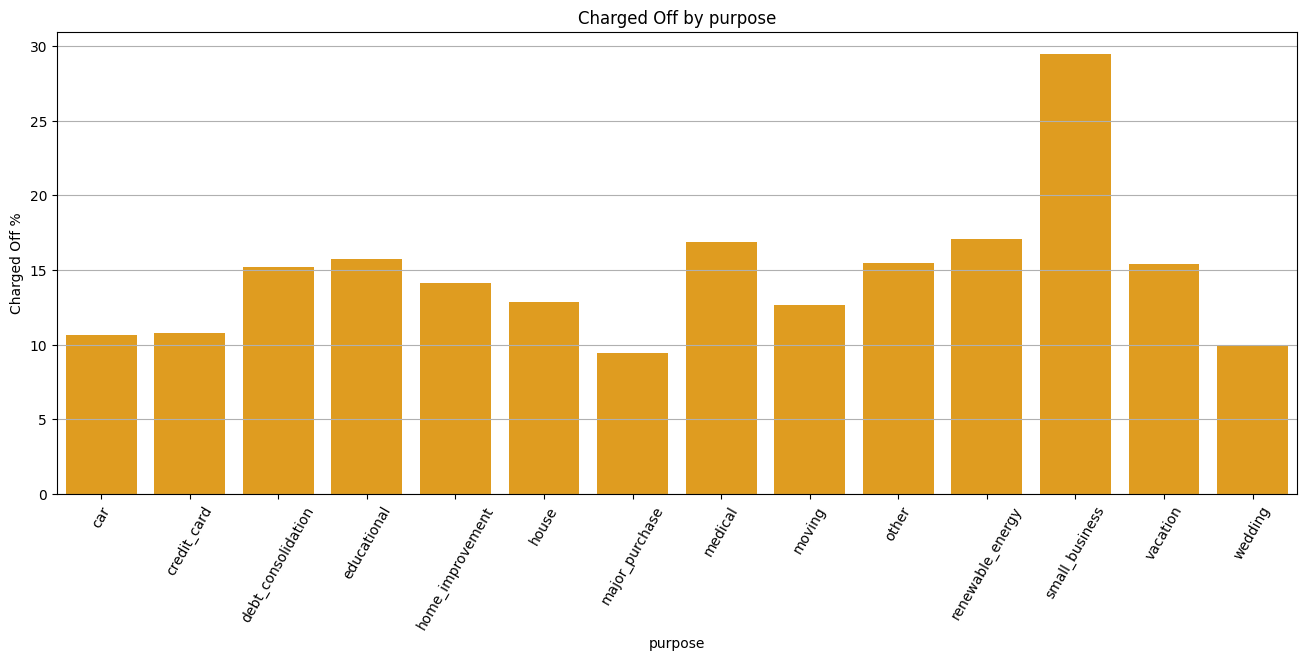

In [76]:
display_pc_charge_off_plot('purpose', 'Charged Off by purpose', 'purpose', fig_size=(16,6))

## Barplot Homeownership and defaulters percentage

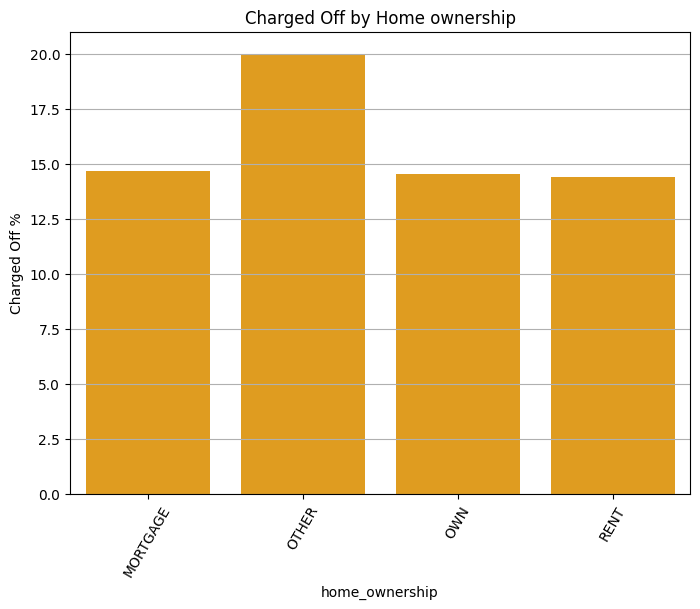

In [77]:
display_pc_charge_off_plot('home_ownership', 'Charged Off by Home ownership', 'home_ownership')

## Barplot Addresss state and defaulters percentage

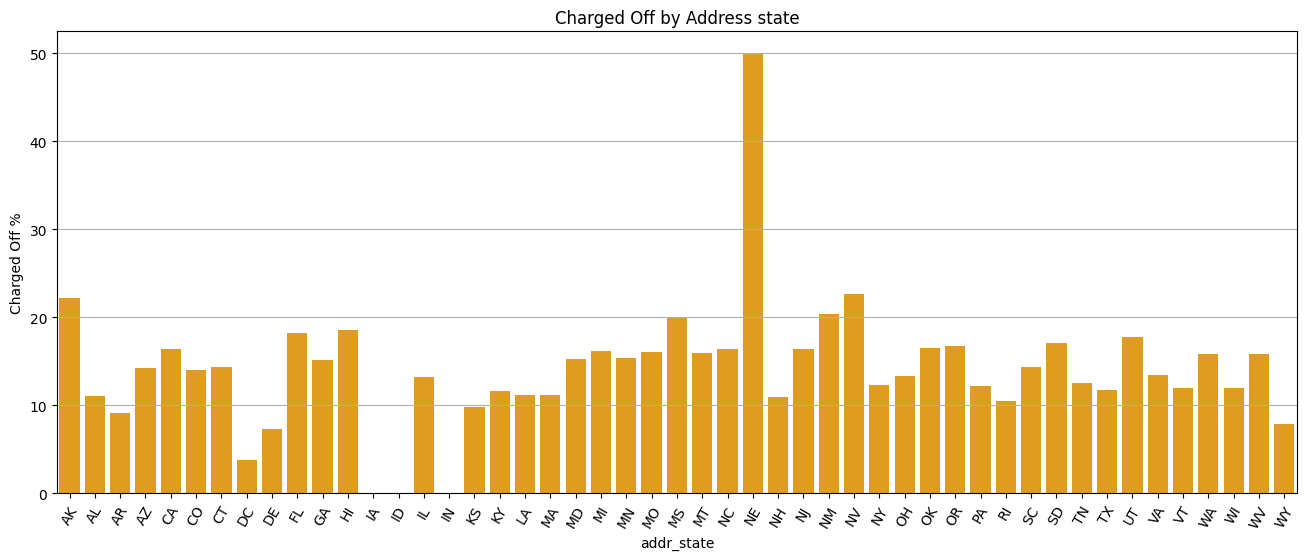

In [78]:
display_pc_charge_off_plot('addr_state', 'Charged Off by Address state', 'addr_state', fig_size=(16,6))

## Barplot DTI categories and defaulters percentage

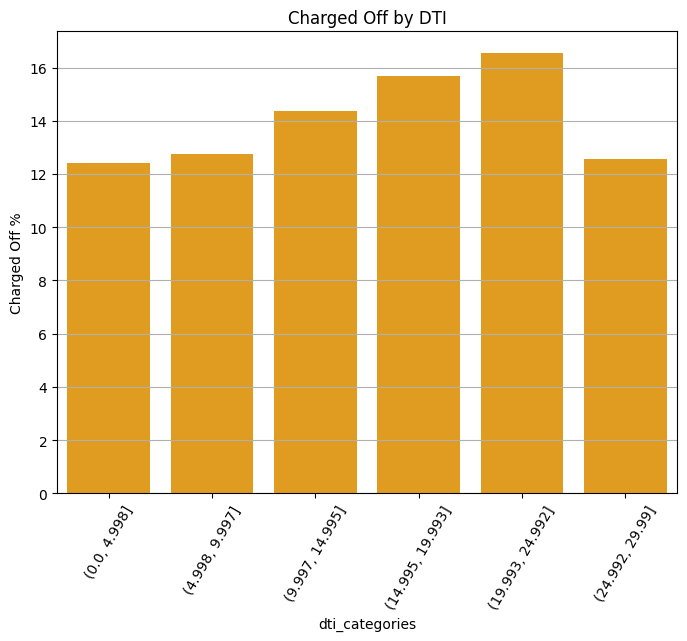

In [79]:
display_pc_charge_off_plot('dti_categories', 'Charged Off by DTI', 'dti_categories')

## Barplot Earliest credit line year and defaulters percentage

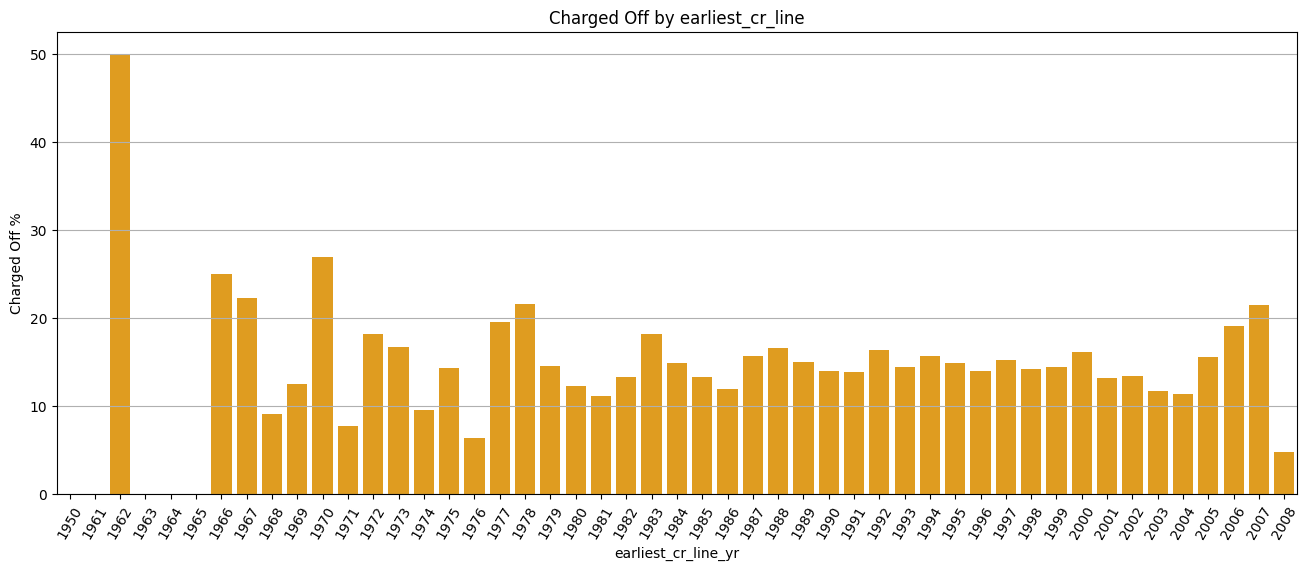

In [80]:
display_pc_charge_off_plot('earliest_cr_line_yr', 'Charged Off by earliest_cr_line', 'earliest_cr_line_yr', fig_size=(16,6))

## Barplot Earliest credit line year categories and defaulters percentage

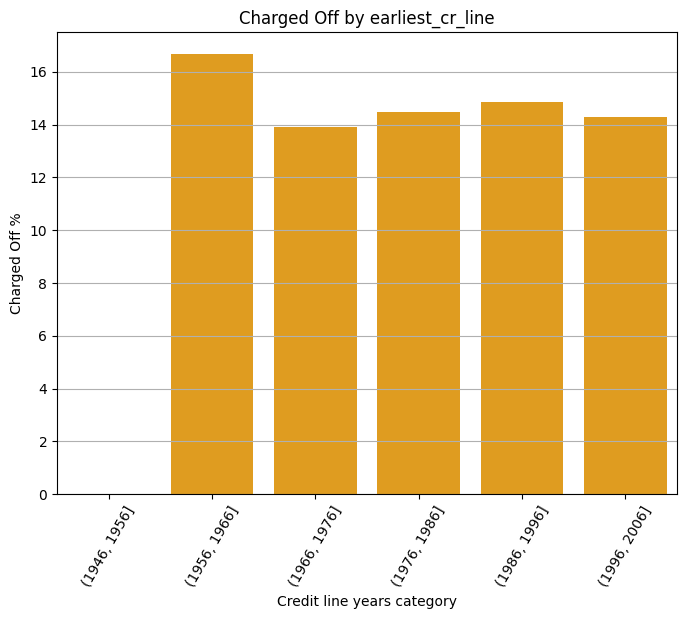

In [81]:
display_pc_charge_off_plot('earliest_cr_line_yr_categories', 'Charged Off by earliest_cr_line', 'Credit line years category')

## Barplot Open account and defaulters percentage

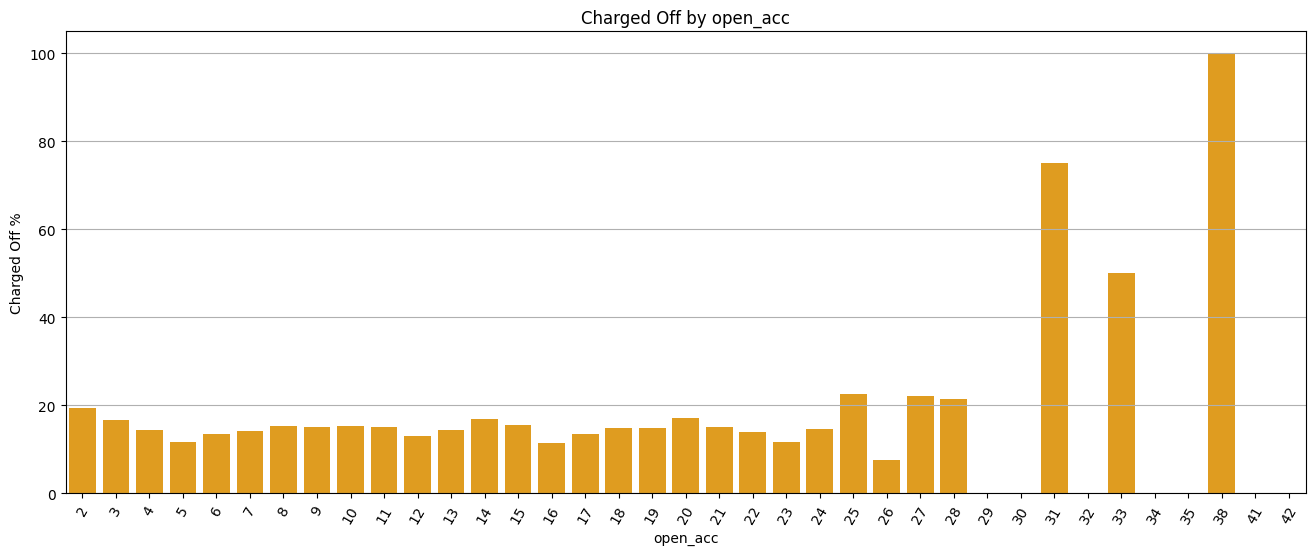

In [82]:
display_pc_charge_off_plot('open_acc', 'Charged Off by open_acc', 'open_acc', fig_size=(16,6))

## Barplot Revolving balance categories and defaulters percentage

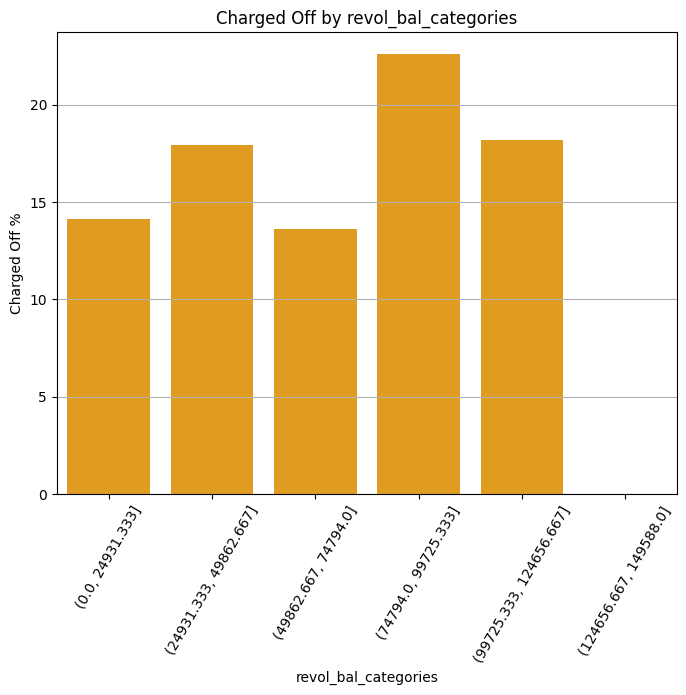

In [83]:
display_pc_charge_off_plot('revol_bal_categories', 'Charged Off by revol_bal_categories', 'revol_bal_categories')

## Barplot Revolving util categories and defaulters percentage

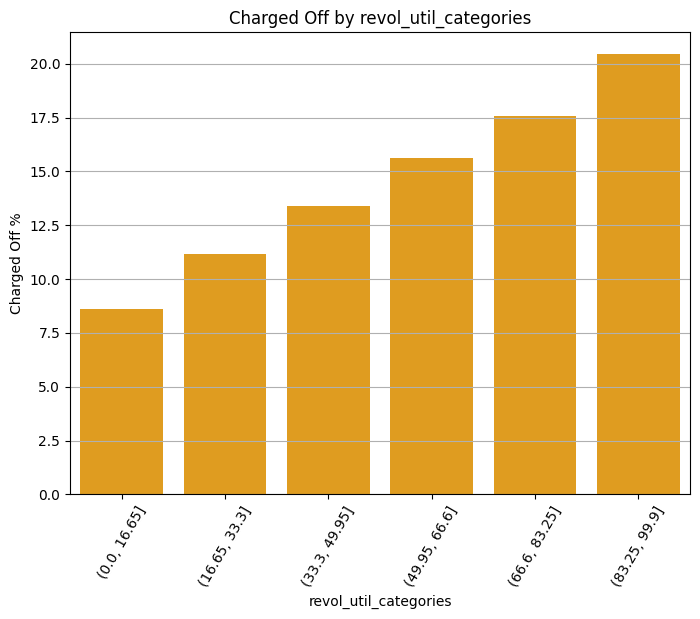

In [84]:
display_pc_charge_off_plot('revol_util_categories', 'Charged Off by revol_util_categories', 'revol_util_categories')

## Barplot total accounts categories and defaulters percentage

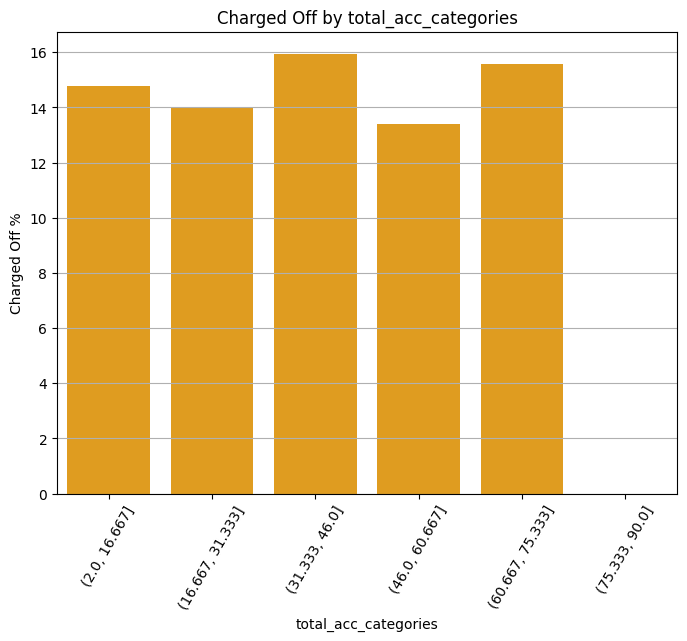

In [85]:
display_pc_charge_off_plot('total_acc_categories', 'Charged Off by total_acc_categories', 'total_acc_categories')

## Barplot Total Payment Investors categories and defaulters percentage

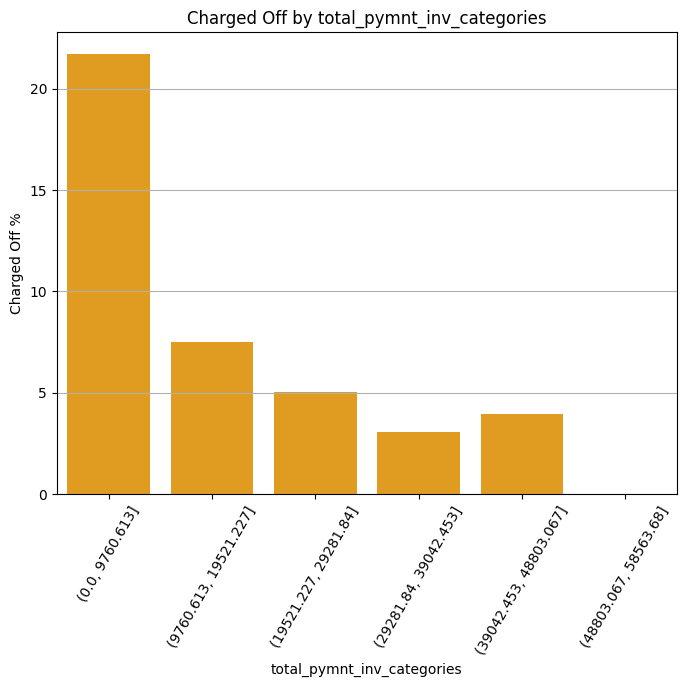

In [86]:
display_pc_charge_off_plot('total_pymnt_inv_categories', 'Charged Off by total_pymnt_inv_categories', 'total_pymnt_inv_categories')

## Barplot Total principal received categories and defaulters percentage

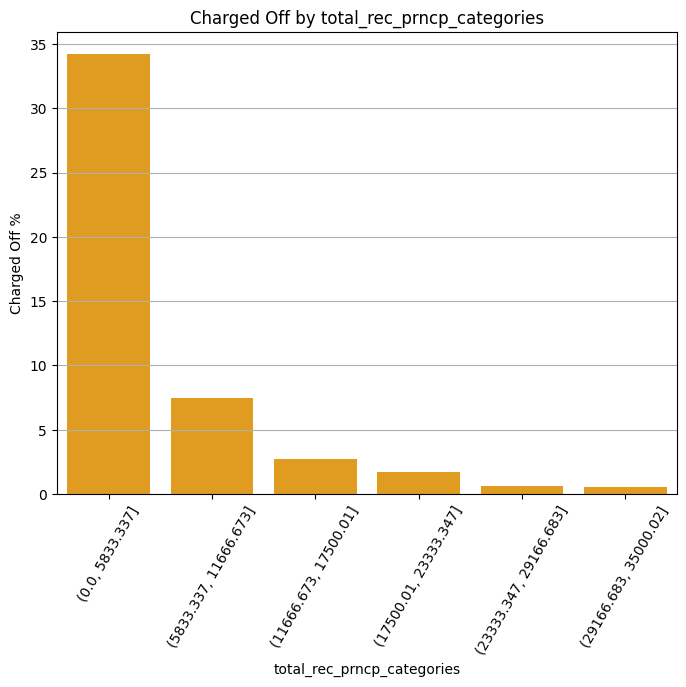

In [87]:
display_pc_charge_off_plot('total_rec_prncp_categories', 'Charged Off by total_rec_prncp_categories', 'total_rec_prncp_categories')

## Barplot Total interest received categories and defaulters percentage

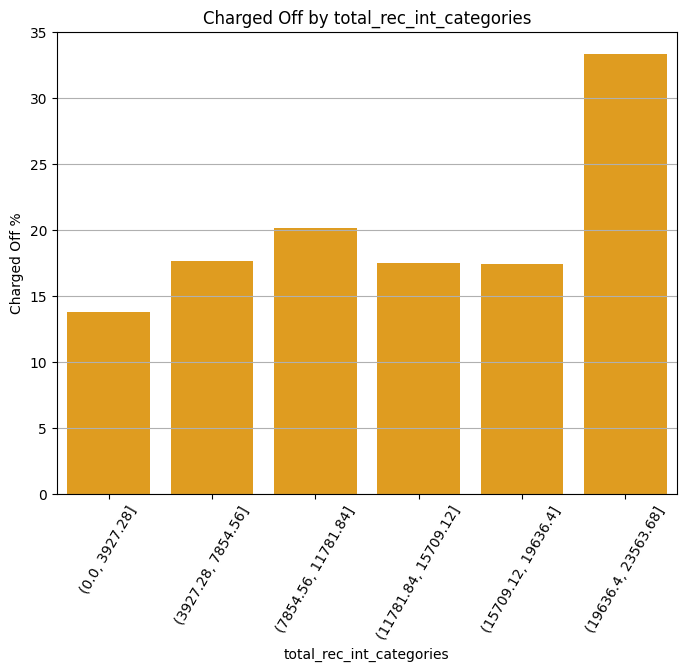

In [88]:
display_pc_charge_off_plot('total_rec_int_categories', 'Charged Off by total_rec_int_categories', 'total_rec_int_categories')

## Barplot Last payment received categories and defaulters percentage

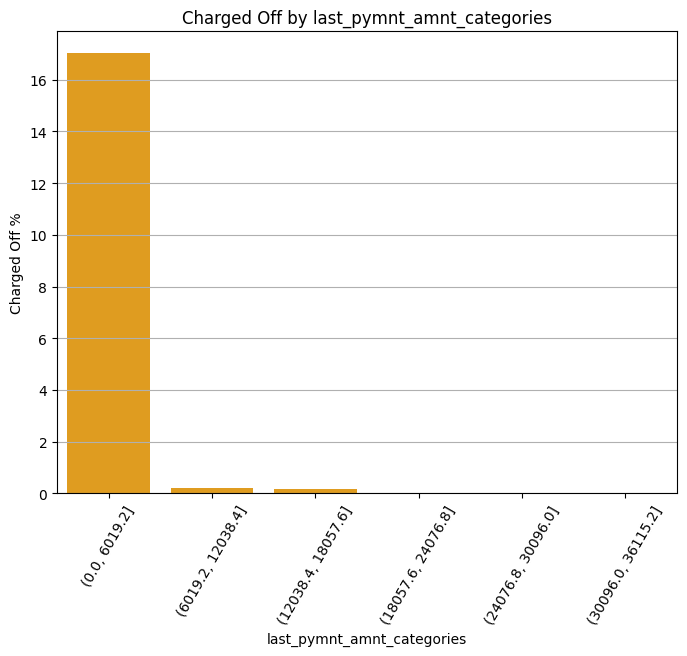

In [89]:
display_pc_charge_off_plot('last_pymnt_amnt_categories', 'Charged Off by last_pymnt_amnt_categories', 'last_pymnt_amnt_categories')

## Barplot employment length and defaulters percentage

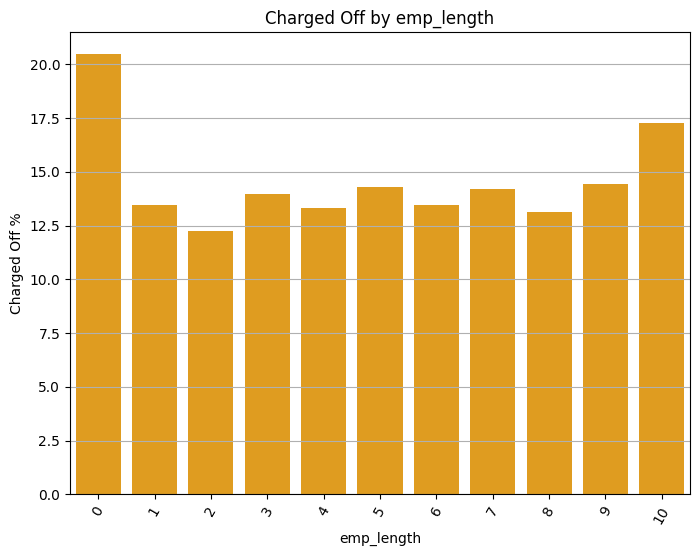

In [90]:
display_pc_charge_off_plot('emp_length', 'Charged Off by emp_length', 'emp_length')

## Barplot Employment duration categories and defaulters percentage

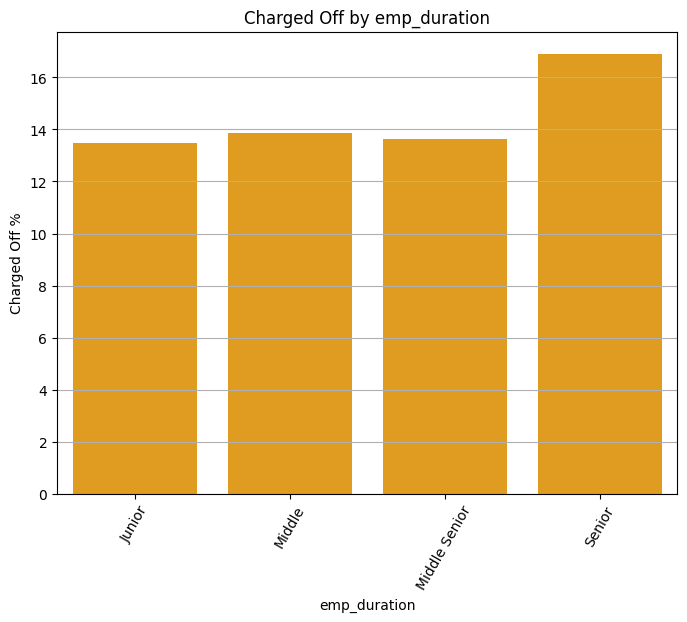

In [91]:
display_pc_charge_off_plot('emp_duration', 'Charged Off by emp_duration', 'emp_duration')